In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot: xlabel='benign_0__mal_1', ylabel='count'>

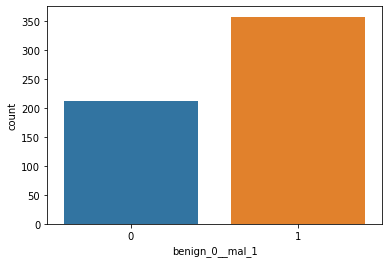

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

<AxesSubplot: >

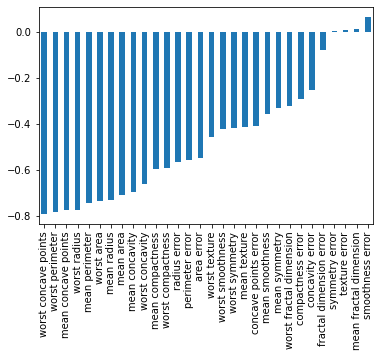

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot: >

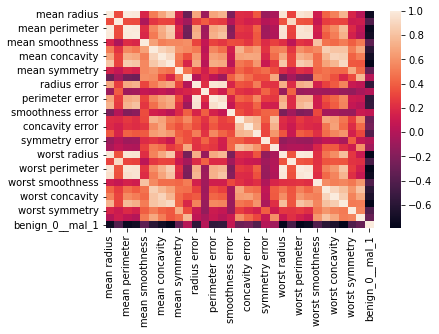

In [11]:
sns.heatmap(df.corr())

In [12]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.fit_transform(X_test)

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense, Dropout

In [21]:
X_train.shape

(426, 30)

In [22]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [23]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 19ms/step - loss: 0.7168 - val_loss: 0.6834
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6789 - val_loss: 0.6625
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6576 - val_loss: 0.6390
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6338 - val_loss: 0.6136
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6101 - val_loss: 0.5860
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5832 - val_loss: 0.5529
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5509 - val_loss: 0.5167
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5111 - val_loss: 0.4711
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4702 - val_loss: 0.4259
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4276 - val_loss: 0.3911
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0562 - val_loss: 0.2667
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0561 - val_loss: 0.2475
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0543 - val_loss: 0.2728
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0541 - val_loss: 0.2591
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0545 - val_loss: 0.2738
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0541 - val_loss: 0.2669
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0557 - val_loss: 0.2877
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0547 - val_loss: 0.2618
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0532 - val_loss: 0.2802
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0545 - val_loss: 0.2789
Epoch 93/600


14/14 [==============================] - 0s 4ms/step - loss: 0.0508 - val_loss: 0.3897
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0452 - val_loss: 0.3822
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0458 - val_loss: 0.4273
Epoch 167/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0453 - val_loss: 0.3923
Epoch 168/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0459 - val_loss: 0.4267
Epoch 169/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0493 - val_loss: 0.3554
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0478 - val_loss: 0.4101
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0440 - val_loss: 0.4557
Epoch 172/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0466 - val_loss: 0.4428
Epoch 173/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0507 - val_loss: 0.4044
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0388 - val_loss: 0.5404
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0393 - val_loss: 0.5113
Epoch 247/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0431 - val_loss: 0.5687
Epoch 248/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0386 - val_loss: 0.5015
Epoch 249/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0389 - val_loss: 0.5507
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0394 - val_loss: 0.5329
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.5332
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0409 - val_loss: 0.6143
Epoch 253/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0438 - val_loss: 0.4951
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0397 - val_loss: 0.5560
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0361 - val_loss: 0.6371
Epoch 327/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0407 - val_loss: 0.6908
Epoch 328/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0349 - val_loss: 0.6142
Epoch 329/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0339 - val_loss: 0.7281
Epoch 330/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0354 - val_loss: 0.6620
Epoch 331/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0352 - val_loss: 0.6678
Epoch 332/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0345 - val_loss: 0.6057
Epoch 333/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0341 - val_loss: 0.7402
Epoch 334/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0364 - val_loss: 0.6308
Epoch 335/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0384 - val_loss: 0.7185
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0347 - val_loss: 0.8337
Epoch 408/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0310 - val_loss: 0.8174
Epoch 409/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0314 - val_loss: 0.8459
Epoch 410/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0346 - val_loss: 0.8694
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0343 - val_loss: 0.8703
Epoch 412/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0312 - val_loss: 0.7849
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0329 - val_loss: 0.8182
Epoch 414/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0310 - val_loss: 0.8406
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0318 - val_loss: 0.8699
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0306 - val_loss: 0.7941
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0336 - val_loss: 0.9191
Epoch 489/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0322 - val_loss: 0.9474
Epoch 490/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0336 - val_loss: 0.9802
Epoch 491/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0283 - val_loss: 0.9165
Epoch 492/600
14/14 [==============================] - 0s 19ms/step - loss: 0.0311 - val_loss: 0.9678
Epoch 493/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0441 - val_loss: 0.9144
Epoch 494/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0321 - val_loss: 0.9689
Epoch 495/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0304 - val_loss: 0.9038
Epoch 496/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0266 - val_loss: 1.0030
Epoch 497/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0294 - val_loss: 0.9461


14/14 [==============================] - 0s 4ms/step - loss: 0.0276 - val_loss: 1.0428
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0309 - val_loss: 1.0467
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0242 - val_loss: 1.0358
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0249 - val_loss: 1.0490
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0248 - val_loss: 1.1102
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0255 - val_loss: 1.0540
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0271 - val_loss: 1.0253
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0250 - val_loss: 1.0551
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0249 - val_loss: 1.1021
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0241 - val_loss: 1.0219
Epoc

In [24]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot: >

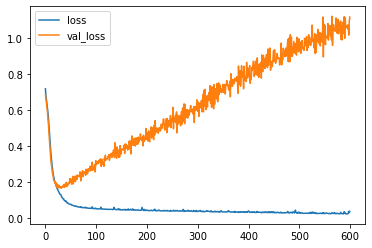

In [25]:
losses.plot()

In [26]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [29]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [30]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6858 - val_loss: 0.6493
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6415 - val_loss: 0.6045
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6003 - val_loss: 0.5610
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5596 - val_loss: 0.5178
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5180 - val_loss: 0.4715
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4770 - val_loss: 0.4295
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4341 - val_loss: 0.3850
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3943 - val_loss: 0.3456
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3568 - val_loss: 0.3112
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3230 - val_loss: 0.2787
Epoch 11

In [31]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot: >

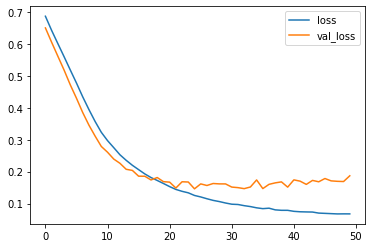

In [32]:
model_loss.plot()

In [33]:
from tensorflow.keras.layers import Dropout

In [34]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [35]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.7081 - val_loss: 0.6839
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6995 - val_loss: 0.6670
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6692 - val_loss: 0.6492
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6728 - val_loss: 0.6313
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6670 - val_loss: 0.6129
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6223 - val_loss: 0.5930
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6178 - val_loss: 0.5723
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6027 - val_loss: 0.5513
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5842 - val_loss: 0.5292
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5554 - val_loss: 0.5026
Epoch 11

14/14 [==============================] - 0s 6ms/step - loss: 0.1083 - val_loss: 0.1352
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1315 - val_loss: 0.1714
Epoch 84: early stopping


In [36]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot: >

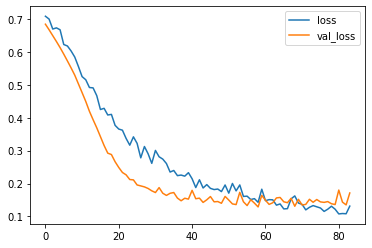

In [37]:
model_loss.plot()

In [43]:
predictions = (model.predict(X_test) > 0.5)*1

5/5 [==============================] - 0s 1ms/step


In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        55
           1       0.99      0.91      0.95        88

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.93       143
weighted avg       0.94      0.94      0.94       143



In [47]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 8 80]]
